* Librerias que voy a usar en el proyecto.

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

* DATASET CON CARACTERISTICAS DE JUGADORES DE FUTBOL TEMPORADAS 2021 y 2022

* Tematica del proyecto.

* Este proyecto tiene como objetivo explorar y comprender la dinámica del rendimiento de los jugadores de fútbol a nivel mundial, utilizando un conjunto de datos que abarca características individuales, estadísticas de partidos y valores económicos asociados. La iniciativa se motiva por la creciente necesidad en la comunidad futbolística de tomar decisiones informadas sobre la gestión de jugadores y estrategias financieras.

* Motivación

* El mundo del fútbol se enfrenta a una creciente complejidad en términos de la gestión de talentos y la toma de decisiones financieras. La comprensión precisa del rendimiento de los jugadores y la valoración económica se ha vuelto crucial para clubes y para el jugador de futbol.
Este proyecto busca abordar esta necesidad, proporcionando insights valiosos para la optimización de decisiones estratégicas en el ámbito deportivo y financiero (tanto sea del jugador, y de los directivos de cada club).

* Audiencia:

* Podemos decir que la misma esta compuesta por dos actores fundamentales, los clubes y toda su parte directiva, que va desde el presidente del mismo y la comision directiva. Y el jugador con (puedo no tenerlo) su representante.  Ambos dos buscaran sacar la mayor eficiencia economica, para aumentar sus ingresos.

* Características del Dataset:

* El conjunto de datos abarca una amplia gama de características individuales, estadísticas de partidos y valores económicos actuales y máximos de jugadores. Esto proporciona una visión al detalle de cada jugador, permitiendo un análisis exhaustivo del rendimiento y el valor en el contexto global del fútbol.

* Lectura del DataSet

In [4]:
df=pd.read_csv("./data.csv")
df.head(1)

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


* Análisis Exploratorio de Datos (EDA)

* A continuacion vamos a hacer un describe para ver las estadisticias descriptivas sobre variables numericas.

* Variables --> Altura, Edad, Apariciones, Goles, Asistencias, entre otras 

In [10]:
df.describe().round(2)


,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,Tarjetas Rojas,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
count,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,10754.00,1.075400e+04,1.075400e+04,10754.00,10754.00
mean,181.24,26.04,36.41,0.13,0.09,0.19,0.00,0.01,0.13,0.04,2470.79,117.96,15.83,1.96,3.622971e+06,6.152606e+06,2.71,0.31
std,6.97,4.78,26.53,0.24,0.14,0.43,0.03,0.08,0.44,0.92,2021.70,175.21,23.38,3.74,9.095410e+06,1.338988e+07,0.99,0.46
min,156.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,1.00,0.00
25%,176.00,22.00,12.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,660.00,0.00,0.00,0.00,3.000000e+05,4.500000e+05,2.00,0.00
50%,181.24,26.00,35.00,0.05,0.04,0.15,0.00,0.00,0.00,0.00,2101.50,37.00,5.00,1.00,8.000000e+05,1.500000e+06,3.00,0.00
75%,186.00,29.00,59.00,0.17,0.13,0.25,0.00,0.00,0.00,0.00,3968.00,181.00,24.00,2.00,3.000000e+06,5.000000e+06,4.00,1.00
max,206.00,43.00,107.00,11.25,4.00,30.00,1.00,6.92,9.00,90.00,9510.00,2349.00,339.00,92.00,1.800000e+08,2.000000e+08,4.00,1.00


* Definicion de la tematica.

* Edad y Valor : Como se relacionan la edad de los jugadores respecto al valor de cada jugador ( en USD).

* En el mundo del fútbol, la edad de los jugadores se ha convertido en un factor crucial a la hora de evaluar su valor en el mercado. En este analisis, analizaremos cómo la edad de los jugadores impacta directamente en su valor, representado en cifras monetarias en dólares estadounidenses. ¿Existe una correlación clara entre la edad de un jugador y su valor en el mercado futbolístico?

* Preguntas de Interés

* ¿Cómo impacta la edad en el valor actual de los jugadores de fútbol?

* ¿Cuándo el Valor Actual supera al Valor Máximo en la carrera de un jugador?

* ¿En qué edad se produce el punto de inflexión donde el Valor Actual no alcanza al Valor Máximo?

* ¿A menor edad, la tendencia es que el valor maximo y el actual, son parecidos?

* Hipótesis:

* "Los jugadores de 20 a 25 años, llegan a su punto o valor maximo, del monto de su pase."

In [20]:
# limpio la  el nombre de la posicion
df['Posicion']= df['Posicion'].str.extract(r'^\s*([^\s-]+)')

In [21]:
# tomo las columnas que voy a usar del df original.
df_jugadores=df[['Nombre','Posicion','Equipo','Edad','Valor Actual','Valor Maximo']]

In [22]:
# Desactivar la advertencia SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

In [23]:
# dejo los valores en millones para que sea mas facil de trabajar.
df_jugadores['Valor Actual'] = df_jugadores['Valor Actual'] / 1000000
df_jugadores['Valor Maximo'] = df_jugadores['Valor Maximo'] / 1000000
df_jugadores['Dif Maximo - Actual'] = df_jugadores['Valor Actual'] - df_jugadores['Valor Maximo']


In [24]:
# trabajo en un copia, por seguridad
df_equipos=df_jugadores.copy()
df_equipos_2=df_jugadores.copy()


In [25]:
# Agrupo por Edad y Posicion, y calculo el promedio del valor actual, y valor maximo.
df_jugadores = df_jugadores.groupby(['Edad']).agg({'Valor Actual':'mean', 
                                                                'Valor Maximo':'mean'}).reset_index()


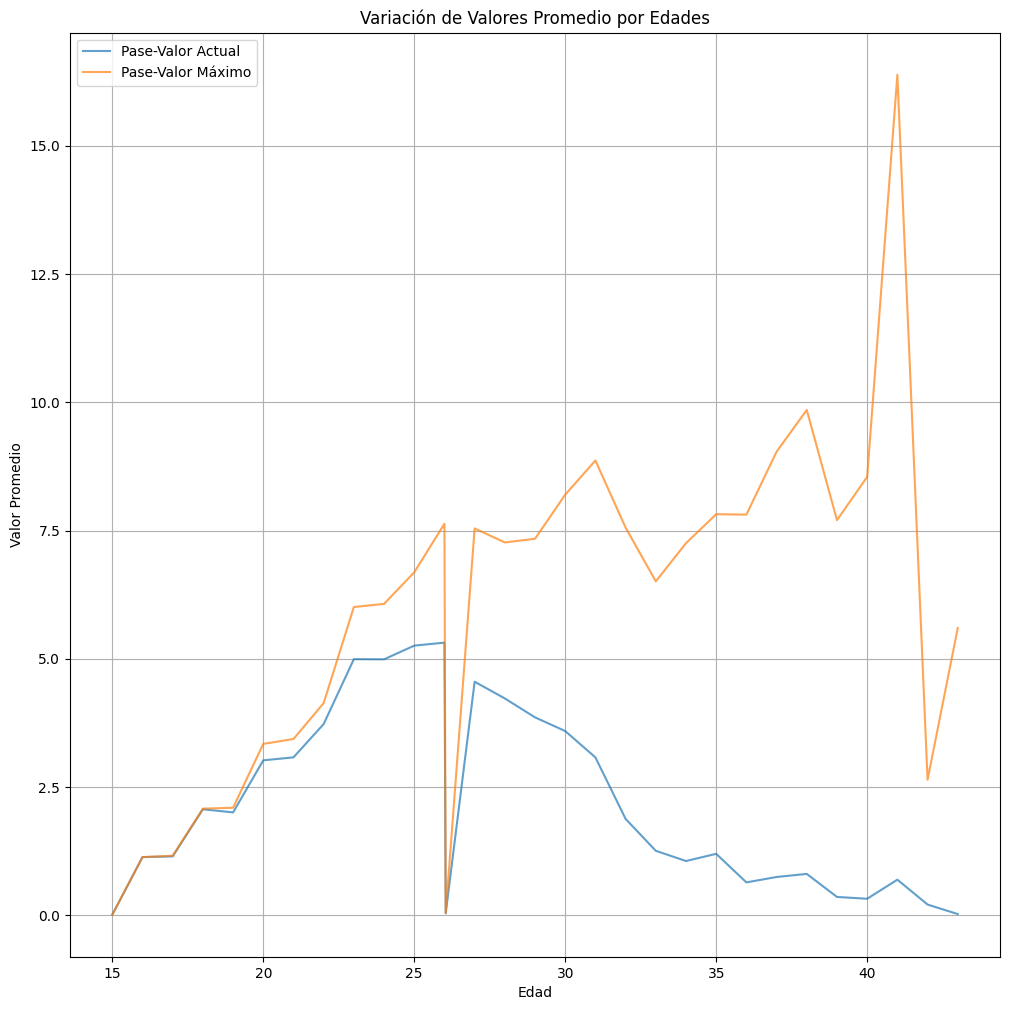

In [26]:
# Creo la figura
plt.figure(figsize=(12, 12))


# Uso un linePlot, que marcara, el recorrido del valor del pase actual, y el valor maximo de cada jugador.
sns.lineplot(x='Edad', y='Valor Actual', data=df_jugadores, label='Pase-Valor Actual', alpha=0.7)
sns.lineplot(x='Edad', y='Valor Maximo', data=df_jugadores, label='Pase-Valor Máximo', alpha=0.7)

# Configuración del gráfico (titulos y leyendas)
plt.title('Variación de Valores Promedio por Edades')
plt.xlabel('Edad')
plt.ylabel('Valor Promedio')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


* Conclusiones:
* En el grafico podemos notar las variaciones del valor de los pases.
* Podemos concluir que en el primer rango, 15-25 años, practicamente el valor actual coincide con el valor
 máximo del jugador, podemos decir que esta a tope de su carrera, llegando a su cotizacion maxima.
* Luego a partir de los 25 años el valor comienza con una marcada, pero leve tendencia a la baja del valor actual, constrastando mucho con su pico maximo. 
* Y el ultimo rango , podemos decir que va de los 32/33 años en adelante, el valor actual empieza una marcada
caida de su valor.

------------------------------------------------------------------------------------------------

*                         A continuacion, se creara un Df con los equipos mas valiosos del mundo.

* Se fraccionara las edades por rango, menores de 20, de 20 a 26, 27 a 30, y mayores de 30

* Se plantea asi, para entender como estan compuesto por edades los equipos mas valiosos, y si tiene relacion, con la variacion de los valores de los pases de los jugadores, respecto a la edad, y al avance de la misma.

* Usando la Hipotesis anterior "Los jugadores de 20 a 25 años, llegan a su punto o valor maximo, del monto de su pase.", analizaremos los equipos mas valiosos del mundo, y veremos como estan compuesto segun rango de edad.

In [28]:
# se crea una lista con los intervalos de edades
lista_edades_rango = [0, 20, 26, 30, 100]

# lista con el nombre de los intervalos
rango = ['Menores de 20', '20-26', '27-30', 'Mayores de 30']

# creo la columna rangos de edad, que segmentara segun condicion.
df_equipos_2['Rango Edad'] = pd.cut(df_equipos_2['Edad'], bins=lista_edades_rango , labels=rango)

# Creo un df, que me va a agrupar por equipo segun las siguientes operaciones
# valor total de cada equipo
# edad promedio de cada equipo (mean)
# contar la cantidad de jugadores.
df_agrupado = df_equipos_2.groupby(['Equipo', 'Rango Edad']).agg({
    'Valor Actual': 'sum',
    'Edad': 'mean',
    'Nombre': 'count'
}).reset_index()


# creo un df, usando la funcion pivot, por practicidad.
df_pivot = df_agrupado.pivot(index='Equipo', columns='Rango Edad', values=['Valor Actual', 'Nombre'])


# Renombrar las columnas
df_pivot.columns = [f'{col[0]}_{col[1]}' for col in df_pivot.columns]

# Calcular el valor total del equipo
df_pivot['Valor Total'] = df_pivot['Valor Actual_Menores de 20'] + df_pivot['Valor Actual_20-26'] + df_pivot['Valor Actual_27-30'] + df_pivot['Valor Actual_Mayores de 30']

# cantidad de jugadores segun rango de edades
df_pivot['- 20'] = df_pivot['Nombre_Menores de 20']
df_pivot[' 20-26'] = df_pivot['Nombre_20-26']
df_pivot[' 27-30'] = df_pivot['Nombre_27-30']
df_pivot['+30'] = df_pivot['Nombre_Mayores de 30']

# Eliminar columnas innecesarias, ya que no las necesito 
df_pivot.drop(columns=['Valor Actual_Menores de 20', 'Valor Actual_20-26', 'Valor Actual_27-30', 'Valor Actual_Mayores de 30','Nombre_Menores de 20', 'Nombre_20-26', 'Nombre_27-30', 'Nombre_Mayores de 30'], inplace=True)

# Calcular la edad promedio por equipo
df_promedio_edad = df_equipos.groupby('Equipo')['Edad'].mean().round(1).reset_index()

# renombro la columna
df_promedio_edad.rename(columns={'Edad': 'Edad Promedio'}, inplace=True)

# Combinar con el df , del promedio de edad ,  con el pivot y agregarlo como una nueva fila al final
df_pivot = pd.merge(df_pivot, df_promedio_edad, on='Equipo', how='left')

# Ordeno el df pivot por valor total  (descendente)
df_pivot.sort_values(by='Valor Total', ascending=False)

# creo un df con los 20 equipos mas valiosos del mundo.
df_top10_equipos = df_pivot.sort_values(by='Valor Total', ascending=False).head(10)
df_top10_equipos.reset_index(drop=True, inplace=True)


* Conclusiones

* En el df que esta a continuacion, la hipotesis que planteamos del rango de edad 20/25, podemos concluir que:

* Al sumar los valores de mercado de los jugadores de cada equipo, se observa que la mayoría de la composición total proviene principalmente del rango de edades entre 20 y 25 años. Incluso considerando a los jugadores menores de 20 años, como por ejemplo, aquellos con 19 años, también constituyen una parte significativa del conjunto. Es evidente que, al ampliar el rango hasta los 30 años, estos jugadores conforman casi en su totalidad el plantel de los equipos, destacando la importancia de este grupo etario en la estructura de los equipos.

* A continuacion vamos a graficarlo para ponerlo en perspectiva.

In [29]:
df_top10_equipos


,Equipo,Valor Total,- 20,20-26,27-30,+30,Edad Promedio
0,Manchester City,1051.25,2.0,7.0,10.0,5.0,27.0
1,Chelsea FC,1015.50,4.0,16.0,5.0,7.0,25.5
2,Bayern Munich,979.70,5.0,7.0,7.0,8.0,26.5
3,Arsenal FC,890.00,0.0,16.0,6.0,1.0,25.2
4,Paris Saint-Germain,882.55,9.0,7.0,6.0,5.0,25.1
5,Liverpool FC,879.00,4.0,12.0,7.0,7.0,26.7
6,Real Madrid,870.50,2.0,8.0,6.0,8.0,27.6
7,FC Barcelona,799.00,5.0,10.0,1.0,6.0,25.5
8,Manchester United,795.70,3.0,14.0,10.0,5.0,26.0
9,Tottenham Hotspur,680.30,1.0,14.0,7.0,3.0,26.7


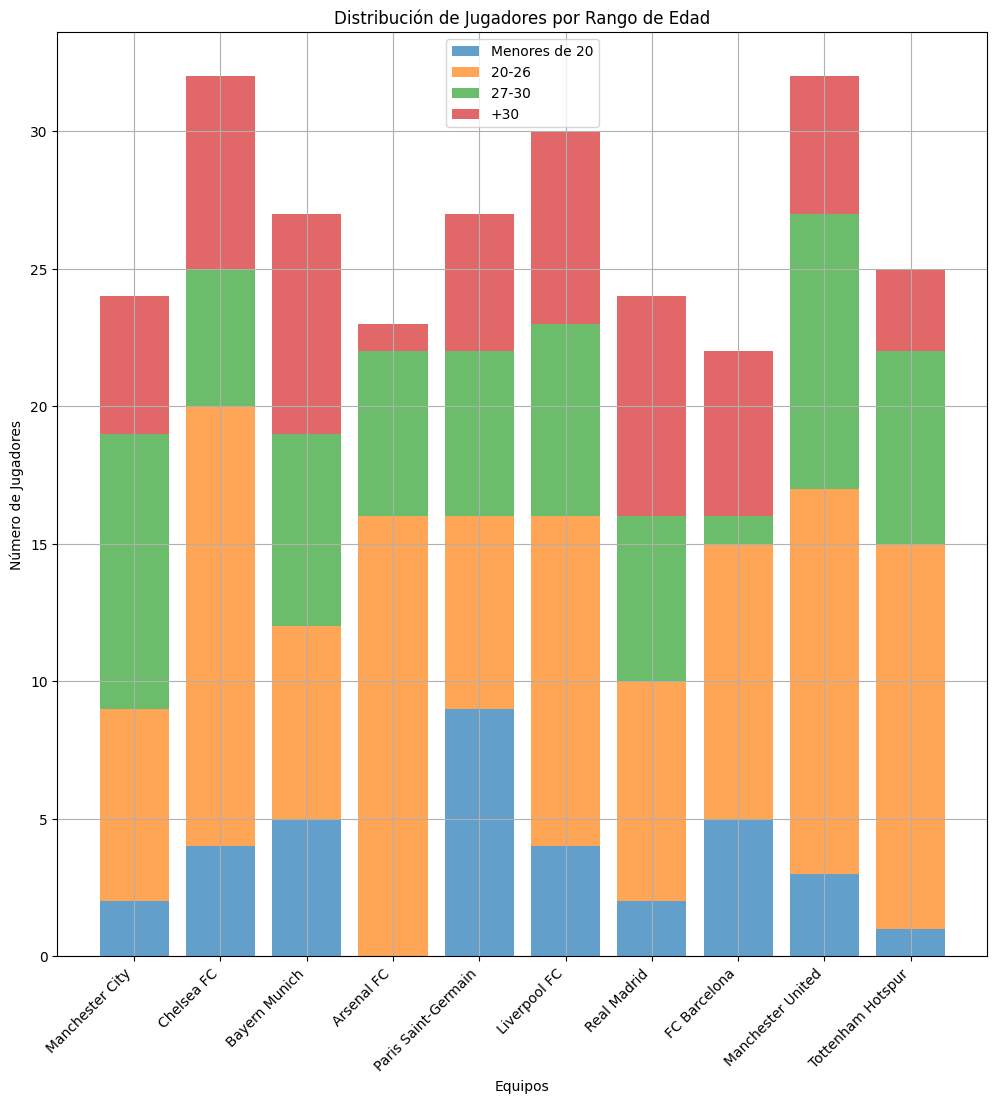

In [30]:
# creo un df, con la cantidad de jugadores por edad
rango_20 = df_top10_equipos['- 20']
rango_20_26 = df_top10_equipos[' 20-26']
rango_27_30 = df_top10_equipos[' 27-30']
rango_30 = df_top10_equipos['+30']

# Crear figura y Configurar el gráfico
plt.figure(figsize=(12, 12))

# a cada barra, le asigno la cantidad por cada rango etario
# se puso de esta forma, para llenar la barra completa, pero dentro de ella, los rango etarios, con su cantidad
# para tener dimension de como estan compuesto los equipos etariamente, de forma grafica.
plt.bar(df_top10_equipos['Equipo'], rango_20,    bottom=0,                                     label='Menores de 20', alpha=0.7)
plt.bar(df_top10_equipos['Equipo'], rango_20_26, bottom=rango_20,                              label='20-26', alpha=0.7)
plt.bar(df_top10_equipos['Equipo'], rango_27_30, bottom=rango_20_26 + rango_20,                label='27-30', alpha=0.7)
plt.bar(df_top10_equipos['Equipo'], rango_30,    bottom=rango_27_30 + rango_20_26 + rango_20,  label='+30',   alpha=0.7)

# Configurar el gráfico
plt.xlabel('Equipos')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Jugadores por Rango de Edad')
plt.legend()
plt.grid(True)

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


* En el grafico de barras, apiladas, podemos ver como estan compuesto los equipos por rangos etarios, y a simple vista, el rango 20/25 mayoritarimente, es el que mas jugadores tiene , y mas aun, cuando lo expandimos al rango menores de  20, mas 20/25, mas 26/30, casi ocupan la totalidad de la plantilla.

* Como conclusion final, podemos decir que la edad es un factor fundamental para el valor actual del pase de un jugador de futbol, y la composicion de la plantilla de los equipos mas ricos del mundo.

----------------------------------------------------------------------------------------------------------

*           EDAD Y LESIONES

* HIPOTESIS

* ¿Existe Relacion entre la edad y los partidos de baja por lesiones?

In [68]:
# normalizo para analizar a los jugadores que jugadoron la mediana de partido o mas , y luego mas adelante 
# a partir de esa mediana agrupo por el promedio de partidos de baja por edad-
filtro =df['Apariciones'].median().round(0)
df_filtrado = df[df['Apariciones'] >= filtro]
edades = df_filtrado.groupby('Edad')['Dias De baja por Lesion'].agg(['mean']).reset_index().round(1)

# renombro la columna.
edades.rename(columns={'mean': 'Prom. de Part. de baja por Lesion'}, inplace=True)

In [69]:
edades

,Edad,Prom. de Part. de baja por Lesion
0,17.0,17.9
1,18.0,34.9
2,19.0,32.8
3,20.0,48.3
4,21.0,59.5
5,22.0,73.9
6,23.0,97.1
7,24.0,113.6
8,25.0,126.0
9,26.0,138.9


* Grafico de HeatMap y Scatter para visualizar la relacion entre las edades y los partidos de baja

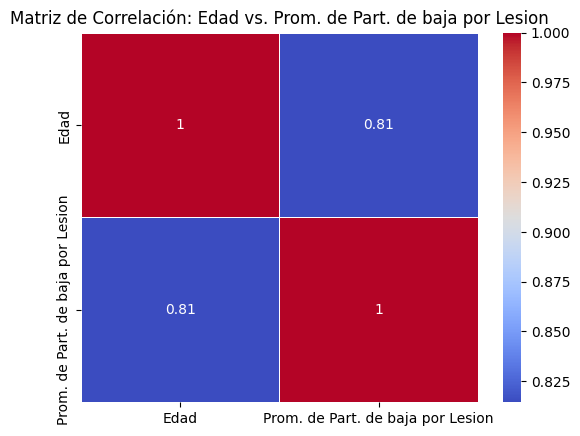

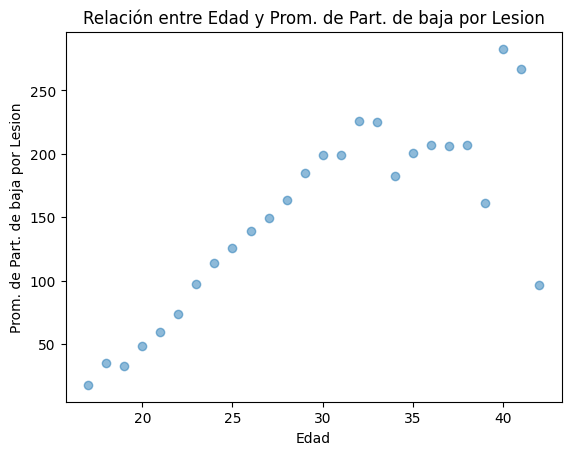

In [71]:
# Correlación entre 'Edad' y 'Prom. de Part. de baja por Lesion'
correlacion = edades[['Edad', 'Prom. de Part. de baja por Lesion']].corr()

# Visualizar
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación: Edad vs. Prom. de Part. de baja por Lesion')
plt.show()

# Scatter para ver la relacion  entre ambas variables
plt.scatter(edades['Edad'], edades['Prom. de Part. de baja por Lesion'], alpha=0.5)
plt.title('Relación entre Edad y Prom. de Part. de baja por Lesion')
plt.xlabel('Edad')
plt.ylabel('Prom. de Part. de baja por Lesion')
plt.show()

* Conclusion de la relacion entre edades y partidos de baja por Lesion.

* En ambos graficos podemos notar que existe una relacion  positiva entre las edades y los partidos de baja por lesiones, es decir, a medida que aumenta la edad, aumenta la cantidad de partidos de baja por lesion.

* Cabe aclarar y repetir que se normalizo con los jugadores que disputaron mas partidos que la mediana de partidos totales.

----------------------------------------------------


*          CONCLUSION FINAL

* En las tres hipotesis, y pruebas realizadas, quedo demostrado en el futbol, lo importante que es el factor edad, tanto sea en el valor del jugador, en la composicion del equipo, y en la influencia sobre los partidos que se puede perder por lesion cada jugador.